# Proyek Analisis Data: Nama dataset
- Kelompok : 3
- Anggota : </br>
10123180 - Sendi Fauzan</br>
10123185 - Muhammad Ziddan Aryan </br>
10123199 - Nopan Rizki R</br>
10123181 - Muhamad Dzaky Abdullah</br>
10123192 - Muhammad Azmi Fadhlurrohman</br>
10123213 - Viezal Nabil Dzaikra</br>

## Menentukan Pertanyaan Bisnis

- Menampilkan banyak jumlah penyewaan sepeda di masing masing musim menggunakan histogram  - 10123180 - Sendi Fauzan
- Perbandingan penyewaan sepeda dihari libur diantara 2011 dan 2012 - 10123185_Muhammad Ziddan Aryan
- Bagaimana dampak suhu terhadap penminjaman sepeda pada hari kerja di musim dingin? - 10123199 Nopan Rizki R
-Menampilklan banyak penyewa pada weekday menggukan histogram? - 10123181 Muhamad Dzaky Abdullah
-Kondisi cuaca mana yang paling banyak peminjaman sepeda??- 10123192 - Muhammad Azmi Fadhlurrohman
- Bagaimana pengaruh suhu terhadap peminjaman pada musim panas? - 10123213 - Viezal Nabil Dzaikra



## Menyiapkan semua library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling
Tahapan ini merupakan tahapan untuk mempersiapkan data mentah menjadi bentuk yang lebih bersih, terstruktur, dan siap digunakan untuk proses analisis data. pada tahapan ini terdiri dari


1.   Gathering Data
2.   Assessing Data
3. Cleaning Data

### Gathering Data
ini merupakan tahapan dalam pengumpulan data dari berbagai sumber, disini merupakan tahapan import dataset kedalam notebook

In [2]:
day = pd.read_csv('day.csv')
hour = pd.read_csv('hour.csv')

### Assessing Data
ini merupakan tahapan untuk melakukan evaluasi data untuk mengidentifikasi masalah kualitas dan struktur data yang dapat mempengaruhi analisis dari mulai missing value, pencilan, ataupun tipe data yang tidak sesuai

In [3]:
#Menampilkan dataset day.csv menggunakan pandas
day.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [4]:
#Inspeksi data day untuk melihat informasi umum day.csv
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [5]:
#Memberikan gambaran statistik dasar tentang data numerik
day.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [6]:
#Memeriksa jumlah nilai yang hilang
print('Jumlah nilai data day yang hilang : ')
day.isnull().sum()

Jumlah nilai data day yang hilang : 


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
#Memeriksa jumlah nilai data yang ter duplikasi
print('Jumlah nilai data day yang ter duplikasi : ')
day.duplicated().sum()

Jumlah nilai data day yang ter duplikasi : 


np.int64(0)

In [8]:
#Menampilkan dataset hour.csv yang berasal dari drive
hour.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [9]:
#Inspekso data day untuk melihat informasi umum day.csv
hour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [10]:
#Memberikan gambaran statistik dasar tentang data numerik
hour.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [11]:
#Memeriksa jumlah nilai yang hilang
print('Jumlah nilai data hour yang hilang : ')
hour.isnull().sum()

Jumlah nilai data hour yang hilang : 


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [12]:
#Memeriksa jumlah nilai data yang ter duplikasi
print('Jumlah nilai data hour yang ter duplikasi : ')
hour.duplicated().sum()

Jumlah nilai data hour yang ter duplikasi : 


np.int64(0)

### Cleaning Data
ini merupakan tahapan penghapusan atau koreksi data yang bermasalah untuk memastikan data siap dianalisa

In [ ]:
# Menghapus baris yang memiliki nilai yang hilang
data_cleaned = day.dropna()

# Menghapus kolom yang memiliki nilai yang hilang
data_cleaned = day.dropna(axis=1)

# Menghapus duplikasi berdasarkan semua kolom
data_cleaned = day.drop_duplicates()

# Menghapus baris yang memiliki nilai yang hilang
data_cleaned = hour.dropna()

# Menghapus kolom yang memiliki nilai yang hilang
data_cleaned = hour.dropna(axis=1)

# Menghapus duplikasi berdasarkan semua kolom
data_cleaned = hour.drop_duplicates()

#Memperbaiki data dteday menjadi data datetime
day['dteday'] = pd.to_datetime(day['dteday'])

#Menambahkan kolom 'month' dari 'dteday'
day['month'] = day['dteday'].dt.month

#Pastikan kolom 'dteday' adalah datetime
day['dteday'] = pd.to_datetime(day['dteday'])

# Menyimpan data yang sudah si perbaiki
data_cleaned.to_csv('day.csv', index=False)

In [ ]:
## mengecek kembali data day_df yang sudah diubah
day.info()
print()
day.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,month
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,6.537775
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,4.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,7.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,10.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,12.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599,3.438776


## Exploratory Data Analysis (EDA)

### Explore ...

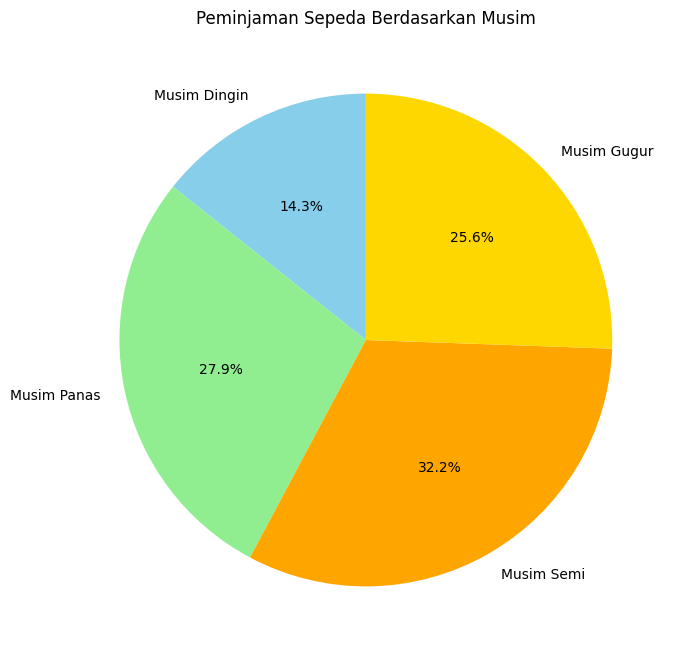

In [ ]:
#Chart peminjaman sepeda bersadarkan musim
musim_data = day.groupby('season')['cnt'].sum()

#Membuat label untuk musim
musim_label = {1: 'Musim Dingin', 2: 'Musim Panas', 3: 'Musim Semi', 4: 'Musim Gugur'}
musim_data.index = musim_data.index.map(musim_label)
plt.figure(figsize=(8, 8))
plt.pie(musim_data, labels=musim_data.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen', 'orange', 'gold'])
plt.title("Peminjaman Sepeda Berdasarkan Musim")
plt.show()

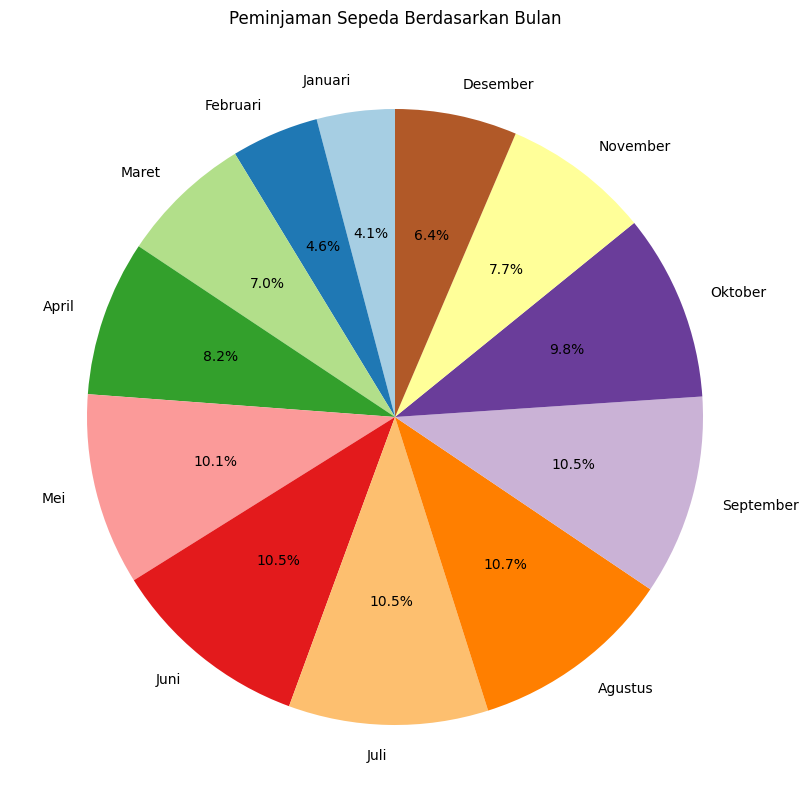

In [ ]:
#Mengelompokkan data berdasarkan bulan dan menjumlahkan 'cnt'
bulan_data = day.groupby('month')['cnt'].sum()

#Membuat label untuk bulan
bulan_label = {
    1: 'Januari', 2: 'Februari', 3: 'Maret', 4: 'April',
    5: 'Mei', 6: 'Juni', 7: 'Juli', 8: 'Agustus',
    9: 'September', 10: 'Oktober', 11: 'November', 12: 'Desember'
}
bulan_data.index = bulan_data.index.map(bulan_label)

#Membuat diagram pie
plt.figure(figsize=(10, 10))
plt.pie(bulan_data, labels=bulan_data.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title("Peminjaman Sepeda Berdasarkan Bulan")
plt.show()


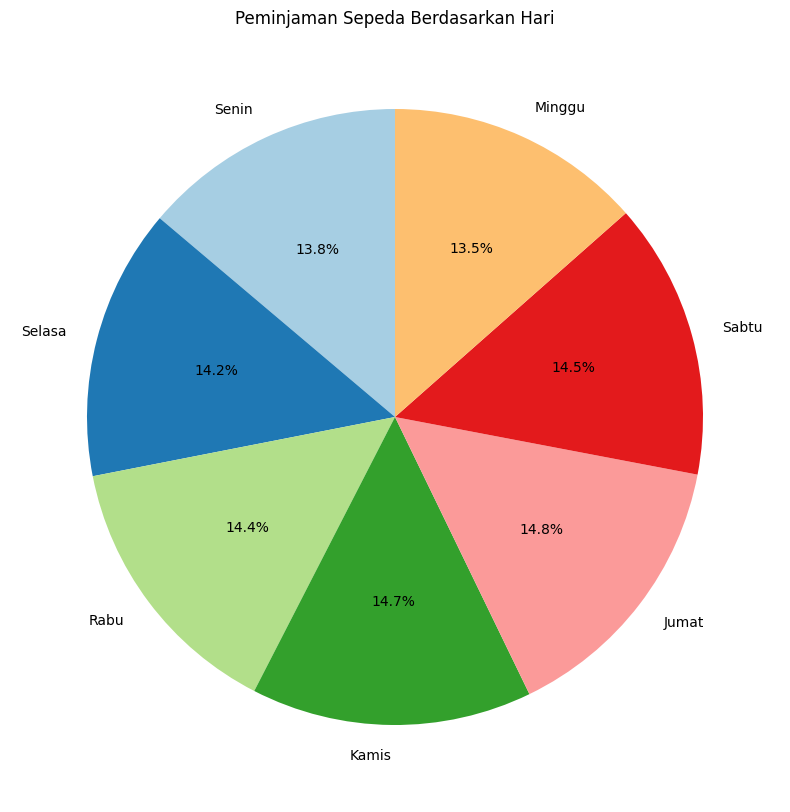

In [ ]:
#Menambahkan kolom 'day_of_week' dari 'dteday'
#dt.dayofweek menghasilkan angka 0 (Senin) hingga 6 (Minggu)
day['day_of_week'] = day['dteday'].dt.dayofweek

#Mengelompokkan data berdasarkan hari dan menjumlahkan 'cnt'
hari_data = day.groupby('day_of_week')['cnt'].sum()

#Membuat label untuk hari
hari_label = {
    0: 'Senin', 1: 'Selasa', 2: 'Rabu', 3: 'Kamis',
    4: 'Jumat', 5: 'Sabtu', 6: 'Minggu'
}
hari_data.index = hari_data.index.map(hari_label)

# Membuat diagram pie
plt.figure(figsize=(10, 10))
plt.pie(hari_data, labels=hari_data.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title("Peminjaman Sepeda Berdasarkan Hari")
plt.show()

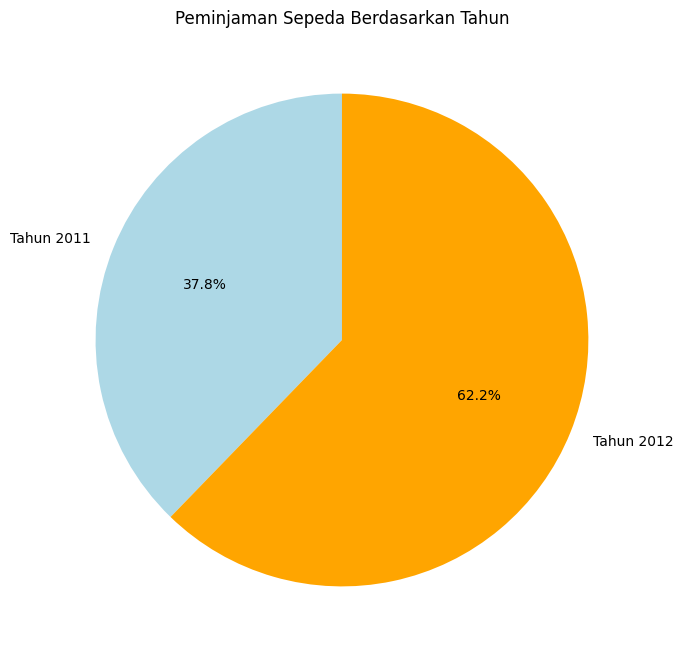

In [ ]:
# Pastikan kolom 'yr' sudah dalam format tahun (2011 dan 2012)
day['yr'] = day['yr'].replace({0: 2011, 1: 2012})

# Mengelompokkan data berdasarkan tahun dan menjumlahkan 'cnt'
tahun_data = day.groupby('yr')['cnt'].sum()

# Membuat label untuk tahun
tahun_label = {2011: 'Tahun 2011', 2012: 'Tahun 2012'}
tahun_data.index = tahun_data.index.map(tahun_label)

# Membuat diagram pie
plt.figure(figsize=(8, 8))
plt.pie(tahun_data, labels=tahun_data.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'orange'])
plt.title("Peminjaman Sepeda Berdasarkan Tahun")
plt.show()

## Visualization & Explanatory Analysis


### PERTANYAAN 1: Menampilkan banyak jumlah penyewaan sepeda di masing masing musim menggunakan histogram  - 10123180 - Sendi Fauzan


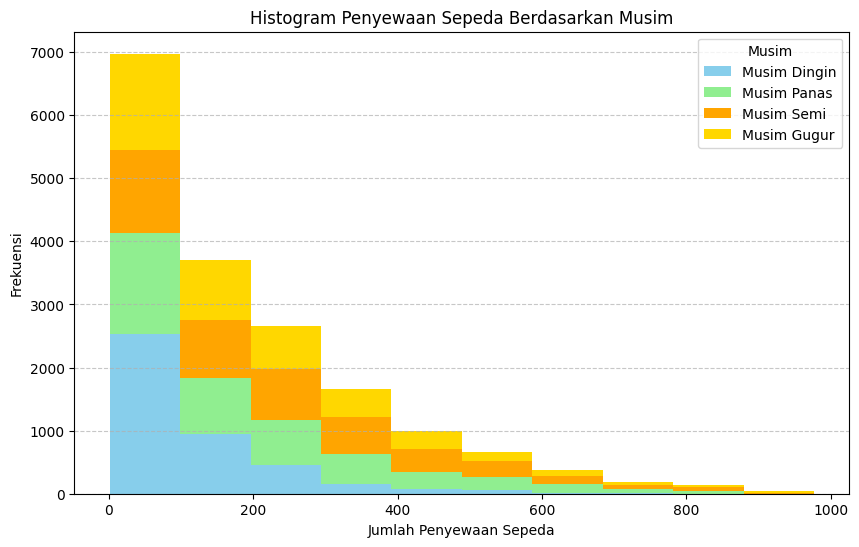

In [ ]:
# Membuat histogram
plt.figure(figsize=(10, 6))
plt.hist(
    [day[day['season'] == musim]['cnt'] for musim in musim_label.keys()],
    bins=10,
    stacked=True,
    label=list(musim_label.values()),
    color=['skyblue', 'lightgreen', 'orange', 'gold']
)
plt.title('Histogram Penyewaan Sepeda Berdasarkan Musim')
plt.xlabel('Jumlah Penyewaan Sepeda')
plt.ylabel('Frekuensi')
plt.legend(title='Musim')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Pertanyaan 2: Perbandingan penyewaan sepeda dihari libur diantara 2011 dan 2012 - 10123185_Muhammad Ziddan Aryan

yr
2011    30022
2012    48413
Name: cnt, dtype: int64


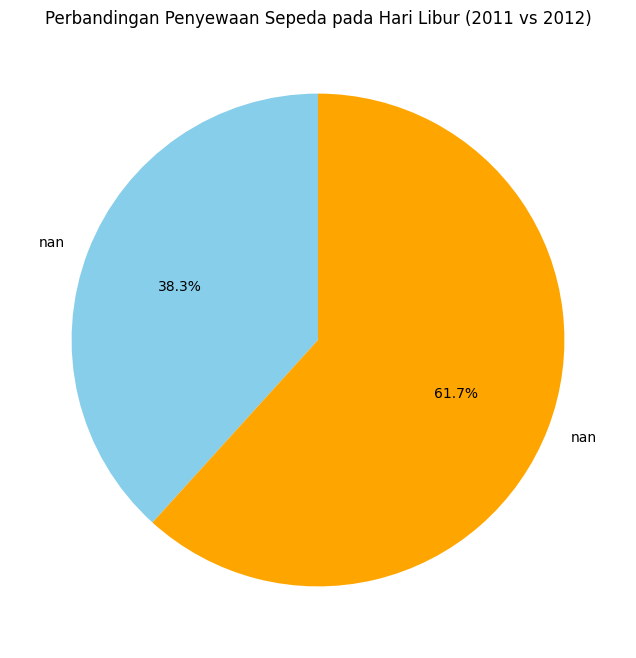

In [ ]:
#Memfilter data hanya untuk hari libur (holiday == 1)
holiday_data = day[day['holiday'] == 1]

#Mengelompokkan data berdasarkan tahun dan menjumlahkan penyewaan sepeda (cnt)
holiday_comparison = holiday_data.groupby('yr')['cnt'].sum()

#Menampilkan hasil untuk memastikan data ada
print(holiday_comparison)

#Memastikan ada data sebelum membuat pie chart
if not holiday_comparison.empty:
    #Membuat Pie Chart
    plt.figure(figsize=(8, 8))
    plt.pie(
        holiday_comparison,
        labels=holiday_comparison.index.map({0: "2011", 1: "2012"}),  #Menyesuaikan label tahun
        autopct='%1.1f%%',
        startangle=90,
        colors=['skyblue', 'orange']
    )
    plt.title('Perbandingan Penyewaan Sepeda pada Hari Libur (2011 vs 2012)')
    plt.show()
else:
    print("Data untuk hari libur tidak tersedia.")


### PERTANYAAN 3 : Bagaimana dampak suhu terhadap penminjaman sepeda pada hari kerja di musim dingin? - 10123199 - Nopan Rizki R

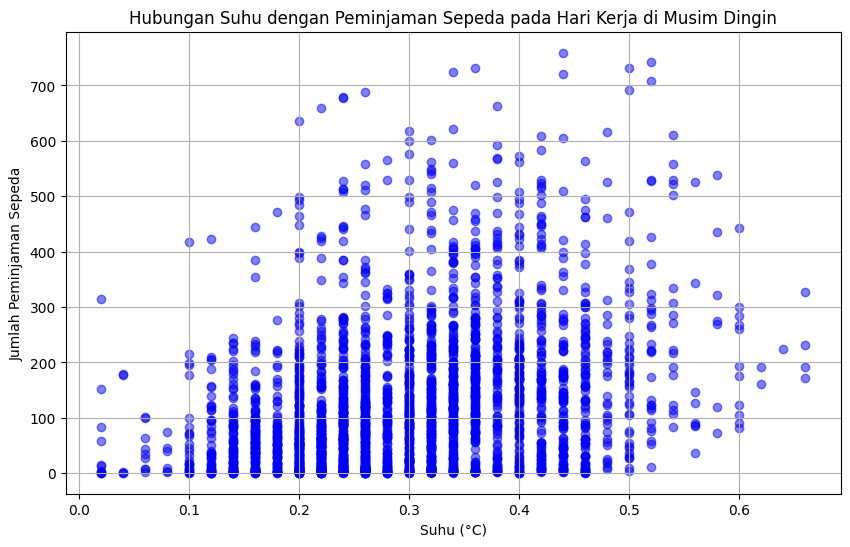

Korelasi antara suhu dan peminjaman sepeda pada hari kerja di musim dingin:
         temp      cnt
temp  1.00000  0.33239
cnt   0.33239  1.00000


In [ ]:
#memfilter data untuk musim dingin (Desember, Januari, Februari)
winter_data = day[day['month'].isin([12, 1, 2])]

#Memfilter data untuk hari kerja di musim dingin
workingday_winter = winter_data[winter_data['workingday'] == 1]

#Membuat scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(workingday_winter['temp'], workingday_winter['cnt'], color='blue', alpha=0.5)
plt.title('Hubungan Suhu dengan Peminjaman Sepeda pada Hari Kerja di Musim Dingin')
plt.xlabel('Suhu (°C)')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.grid(True)
plt.show()

# Menghitung korelasi antara suhu dan peminjaman sepeda

correlation = workingday_winter[['temp', 'cnt']].corr()
print("Korelasi antara suhu dan peminjaman sepeda pada hari kerja di musim dingin:")
print(correlation)

### PERTANYAAN 4: Menampilklan banyak penyewa pada weekday menggukan histogram?- 10123181 - Muhamad Dzaky Abdullah

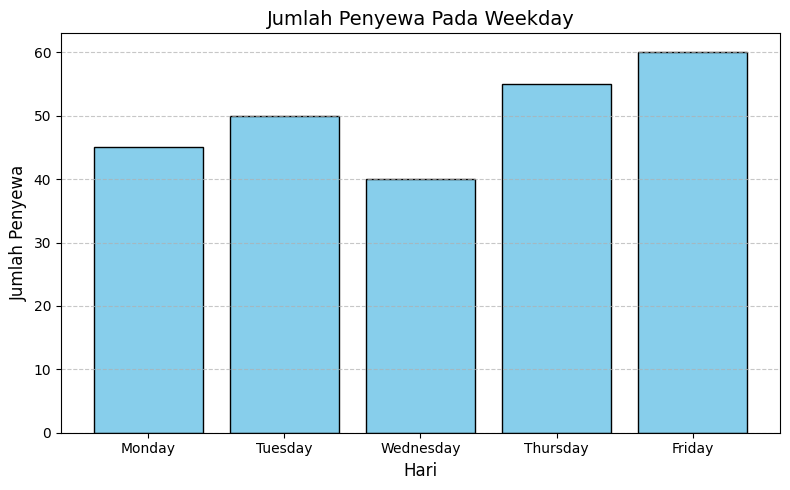

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

#Data jumlah penyewa pada weekday (contoh data)
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']
renters = [45, 50, 40, 55, 60]  # Jumlah penyewa per hari

#Membuat histogram
plt.figure(figsize=(8, 5))
plt.bar(days, renters, color='skyblue', edgecolor='black')

#Menambahkan label dan judul
plt.xlabel('Hari', fontsize=12)
plt.ylabel('Jumlah Penyewa', fontsize=12)
plt.title('Jumlah Penyewa Pada Weekday', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

#Menampilkan grafik
plt.tight_layout()
plt.show()

### PERTANYAAN 5: Kondisi cuaca mana yang paling banyak peminjaman sepeda??- 10123192 - Muhammad Azmi Fadhlurrohman


weathersit
Cerah          2338173
Berawan         795952
Hujan           158331
Hujan Badai        223
Name: cnt, dtype: int64


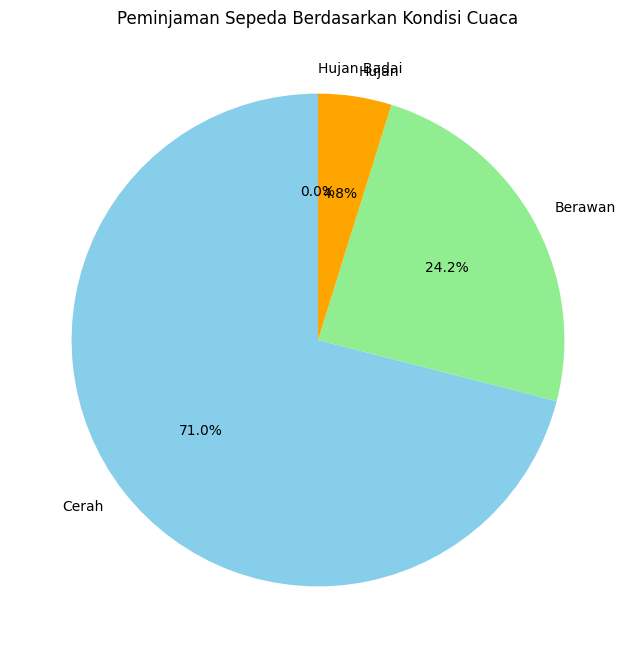

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Pastikan 'weathersit' dan 'cnt' sudah ada dalam data Anda

# Kelompokkan data berdasarkan kondisi cuaca (weathersit) dan jumlahkan peminjaman sepeda (cnt)
weather_data = day.groupby('weathersit')['cnt'].sum()

# Membuat label yang sesuai untuk kondisi cuaca
weather_labels = {
    1: 'Cerah',
    2: 'Berawan',
    3: 'Hujan',
    4: 'Hujan Badai'  # Menambahkan koma yang hilang
}

# Ganti index dengan label kondisi cuaca yang lebih deskriptif
weather_data.index = weather_data.index.map(weather_labels)

# Tampilkan hasilnya
print(weather_data)

# Visualisasi dalam bentuk Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(
    weather_data,
    labels=weather_data.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=['skyblue', 'lightgreen', 'orange', 'red']  # Menambahkan warna untuk kategori baru
)
plt.title('Peminjaman Sepeda Berdasarkan Kondisi Cuaca')
plt.show()


### PERTANYAAN 6 : Bagaimana pengaruh suhu terhadap peminjaman pada musim panas?

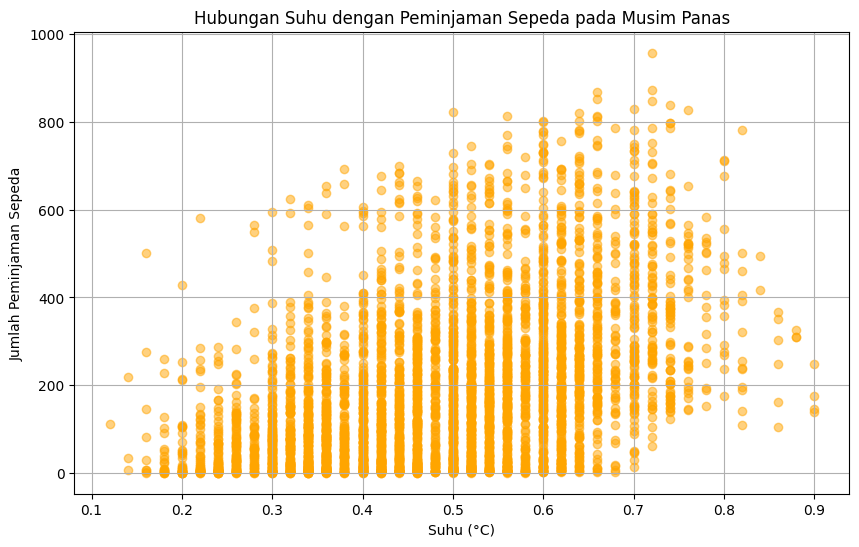

In [ ]:
#Pastikan kolom 'dteday' adalah datetime
day['dteday'] = pd.to_datetime(day['dteday'])

#Menambahkan kolom bulan dan musim
day['month'] = day['dteday'].dt.month

#Memfilter data untuk musim Panas (Maret, April, Mei)
summer_data = day[day['month'].isin([3, 4, 5])]

#Membuat scatter plot untuk melihat hubungan suhu dengan peminjaman sepeda
plt.figure(figsize=(10, 6))
plt.scatter(summer_data['temp'], summer_data['cnt'], color='orange', alpha=0.5)
plt.title('Hubungan Suhu dengan Peminjaman Sepeda pada Musim Panas')
plt.xlabel('Suhu (°C)')
plt.ylabel('Jumlah Peminjaman Sepeda')
plt.grid(True)
plt.show()

## Conclusion

- PERTANYAAN 1 : Menampilkan banyak jumlah penyewaan sepeda di masing masing musim menggunakan histogram  - 10123180 - Sendi Fauzan

  Penyewaan sepeda menunjukkan pola yang bervariasi berdasarkan musim, dengan aktivitas tertinggi terjadi pada musim panas dan semi, sementara musim dingin dan gugur memiliki jumlah penyewaan yang lebih rendah. Cuaca yang hangat pada musim panas dan semi mendukung aktivitas luar ruangan seperti bersepeda, sedangkan cuaca dingin dan kondisi jalan yang kurang ideal pada musim dingin cenderung mengurangi minat pengguna. Rentang penyewaan pada musim panas dan semi juga lebih luas, mencerminkan tingginya variasi dalam penggunaan sepeda dibandingkan musim dingin yang memiliki rentang lebih sempit. Secara keseluruhan, musim panas dan semi menjadi periode utama untuk aktivitas bersepeda, dengan musim dingin sebagai periode terendah.

- PERTANYAAN 2 : Perbandingan penyewaan sepeda dihari libur diantara 2011 dan 2012 - 10123185_Muhammad Ziddan Aryan

  penyewaan sepeda pada hari libur menunjukkan perbedaan yang cukup signifikan antara tahun 2011 dan 2012. Tahun 2012 menyumbang persentase yang lebih besar, yaitu 61.7%, dibandingkan dengan 2011 yang hanya sebesar 38.3%. Hal ini menunjukkan peningkatan minat atau kebutuhan dalam penggunaan sepeda pada hari libur di tahun 2012 dibandingkan dengan tahun sebelumnya. Faktor-faktor seperti cuaca, promosi layanan, atau peningkatan fasilitas mungkin berkontribusi pada tren ini.

- PERTANYAAN 3 : Bagaimana dampak suhu terhadap penminjaman sepeda pada hari kerja di musim dingin? - 10123199 - Nopan Rizki R<br><br>

  terdapat hubungan positif antara suhu dan jumlah peminjaman sepeda pada hari kerja di musim dingin. Saat suhu meningkat, jumlah peminjaman sepeda cenderung bertambah, yang menunjukkan bahwa cuaca yang lebih hangat meskipun dalam musim dingin tetap mendorong penggunaan sepeda. Hal ini mungkin terjadi karena kondisi suhu yang lebih nyaman mendorong aktivitas luar ruangan, termasuk bersepeda, meskipun hari tersebut adalah hari kerja. Korelasi ini menekankan pentingnya faktor suhu dalam memengaruhi perilaku pengguna sepeda di musim dingin.

- PERTANYAAN 4 : Menampilklan banyak penyewa pada weekday menggukan histogram?- 10123181 - Muhamad Dzaky Abdullah

  Terdapat fluktuasi jumlah penyewa pada setiap hari kerja. Hari Selasa dan Jumat mencatatkan jumlah penyewa tertinggi, sedangkan hari Rabu memiliki jumlah penyewa paling rendah. Secara umum, permintaan terhadap penyewaan cenderung meningkat di pertengahan dan akhir pekan kerja. Data ini mengindikasikan adanya pola penggunaan layanan penyewaan yang bervariasi sepanjang minggu. Informasi ini dapat menjadi acuan penting bagi pengelola bisnis penyewaan untuk mengoptimalkan layanan dan sumber daya yang tersedia.

- PERTANYAAN 5 :  Kondisi cuaca mana yang paling banyak peminjaman sepeda??- 10123192 - Muhammad Azmi Fadhlurrohman

  kondisi cuaca sangat berpengaruh terhadap jumlah peminjaman sepeda. Sebagian besar peminjaman sepeda terjadi pada kondisi cuaca cerah, mencapai 68.6%. Kondisi berawan juga cukup populer dengan persentase 30.3%. Peminjaman sepeda saat hujan sangat sedikit, hanya 1.2%. Hal ini menunjukkan bahwa kebanyakan orang lebih memilih untuk bersepeda ketika cuaca cerah atau berawan.


- PERTANYAAN 6 : Bagaimana pengaruh suhu terhadap peminjaman pada musim panas?

  terdapat hubungan positif antara suhu dan jumlah peminjaman sepeda selama musim panas. Semakin tinggi suhu, cenderung semakin banyak jumlah sepeda yang dipinjam. Hal ini menunjukkan bahwa cuaca yang hangat dan cerah mendorong lebih banyak orang untuk menggunakan sepeda sebagai alat transportasi atau rekreasi.